In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Scikit-learn preprocessing and modeling tools
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [3]:
df["Mean_score"]=df[["math score", "reading score" , "writing score" ]].mean(axis=1).round(2)

In [4]:
df["Passed"]=np.where(df["Mean_score"]>=60,1 ,0)

In [5]:
dummies = pd.get_dummies(df[["gender", 
                              "race/ethnicity", 
                              "lunch", 
                              "parental level of education", 
                              "test preparation course",
                            "Passed"]])

# Display the first few rows of the resulting dataframe
dummies.head()

,Passed,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_completed,test preparation course_none
0,1,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True
1,1,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False
2,1,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True
3,0,False,True,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True
4,1,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True


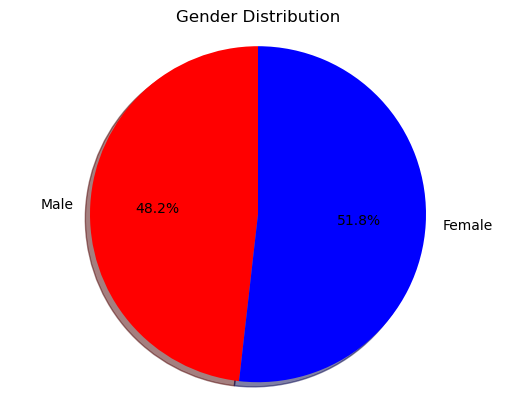

In [6]:
male=(df["gender"] == "male").sum()
female=(df["gender"] == "female").sum()

sizes=[male, female]
labels=["Male", "Female"]

plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    colors=["red", "blue"]
)
plt.title("Gender Distribution")
plt.axis('equal') 
plt.show()


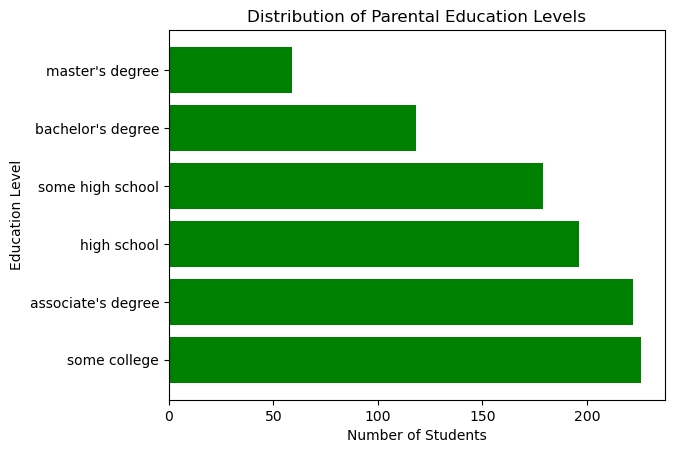

In [7]:
eduction_counts=df["parental level of education"].value_counts()

plt.barh(eduction_counts.index, eduction_counts.values, color="green")
plt.title("Distribution of Parental Education Levels")
plt.xlabel("Number of Students")
plt.ylabel("Education Level")


plt.show()

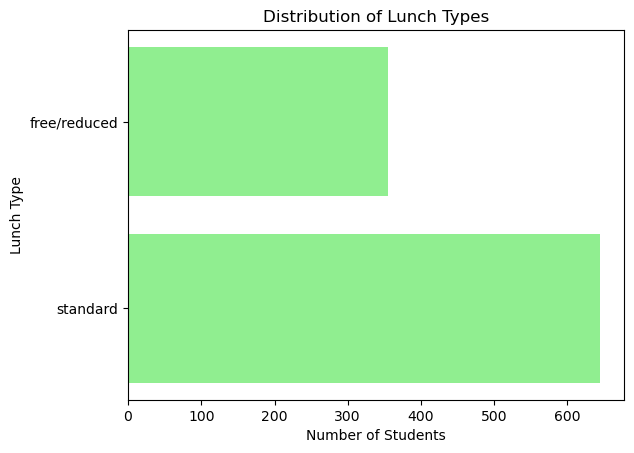

In [8]:
lunch = df["lunch"].value_counts()

plt.barh(lunch.index, lunch.values, color="lightgreen")

plt.title("Distribution of Lunch Types")
plt.xlabel("Number of Students")
plt.ylabel("Lunch Type")

plt.show()

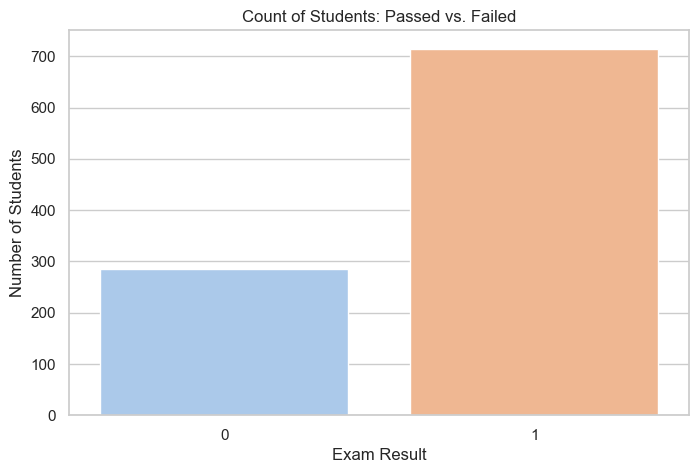

In [9]:
sns.set(style="whitegrid")


plt.figure(figsize=(8, 5))
sns.countplot(x="Passed", hue="Passed", data=df, palette="pastel")

plt.title("Count of Students: Passed vs. Failed")
plt.xlabel("Exam Result")
plt.ylabel("Number of Students")


plt.legend().remove()

plt.show()

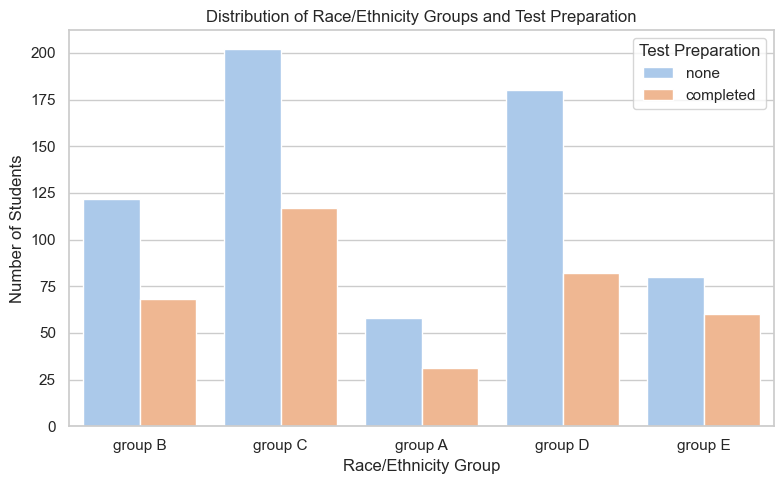

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(
    x="race/ethnicity",
    hue="test preparation course",  # breakdown by prep course
    data=df,
    palette="pastel"
)


plt.title("Distribution of Race/Ethnicity Groups and Test Preparation")
plt.xlabel("Race/Ethnicity Group")
plt.ylabel("Number of Students")

plt.legend(title="Test Preparation")

plt.tight_layout()
plt.show()

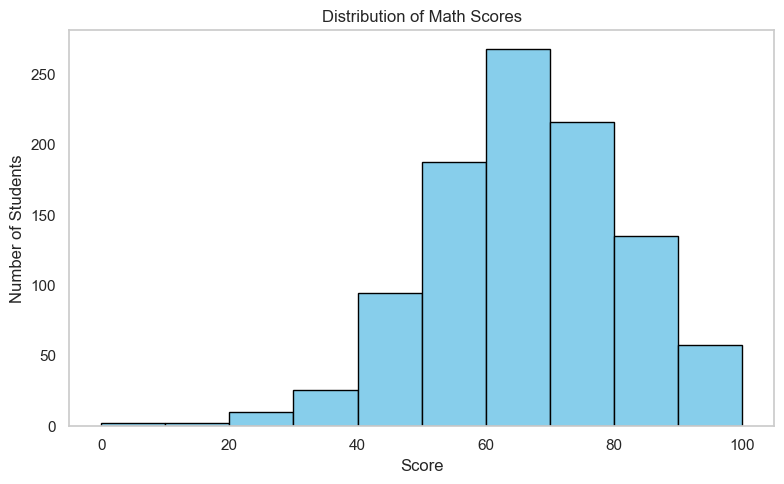

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(
    df["math score"],
    bins=10,
    color="skyblue",
    edgecolor="black"
)

plt.title("Distribution of Math Scores")
plt.xlabel("Score")
plt.ylabel("Number of Students")

plt.grid(False)

plt.tight_layout()
plt.show()

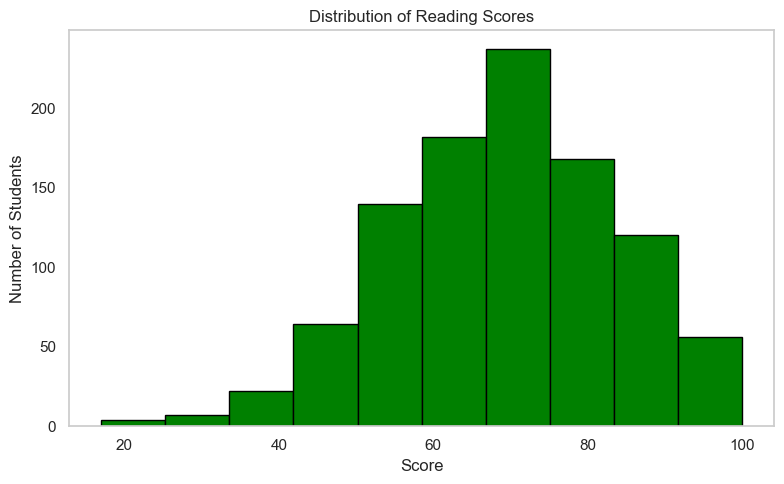

In [12]:
plt.figure(figsize=(8, 5))
plt.hist(
    df["reading score"],
    bins=10,
    color="green",
    edgecolor="black"
)

plt.title("Distribution of Reading Scores")
plt.xlabel("Score")
plt.ylabel("Number of Students")

plt.grid(False)

plt.tight_layout()
plt.show()

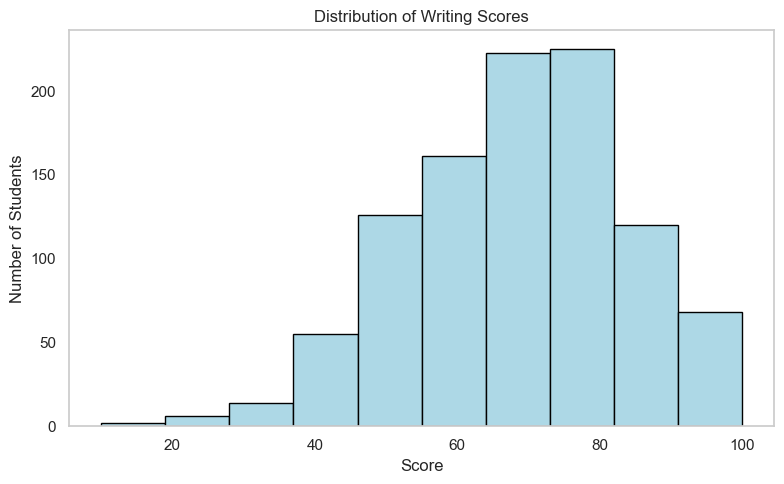

In [13]:
plt.figure(figsize=(8, 5))
plt.hist(
    df["writing score"],
    bins=10,
    color="lightblue",
    edgecolor="black"
)

plt.title("Distribution of Writing Scores")
plt.xlabel("Score")
plt.ylabel("Number of Students")

plt.grid(False)

plt.tight_layout()
plt.show()

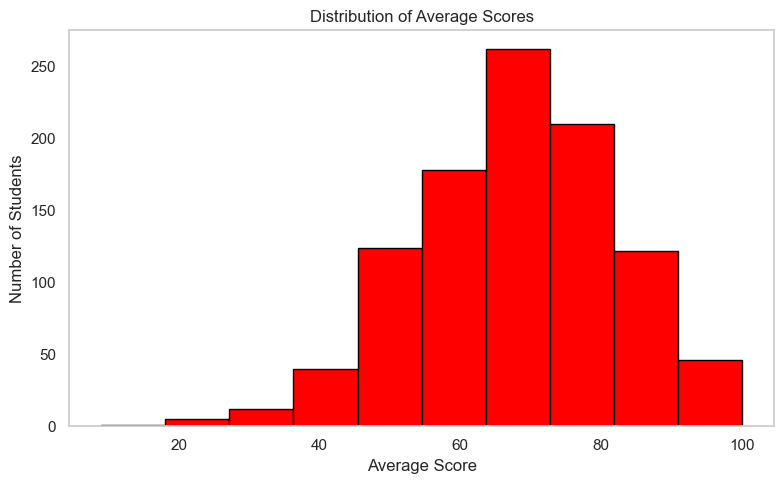

In [14]:
plt.figure(figsize=(8, 5))
plt.hist(
    df["Mean_score"],
    bins=10,
    color="red",
    edgecolor="black"
)

plt.title("Distribution of Average Scores")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

plt.grid(False)

plt.tight_layout()
plt.show()

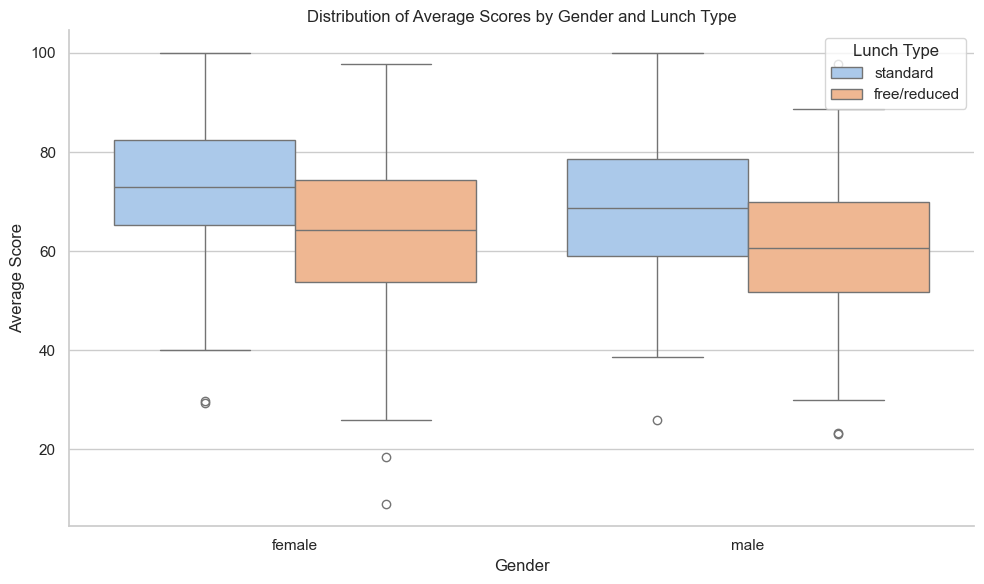

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="gender",
    y="Mean_score",
    hue="lunch",
    data=df,
    palette="pastel"
)

plt.title("Distribution of Average Scores by Gender and Lunch Type")
plt.xlabel("Gender")
plt.ylabel("Average Score")

sns.despine()
plt.legend(title="Lunch Type", loc="upper right")
plt.tight_layout()
plt.show()

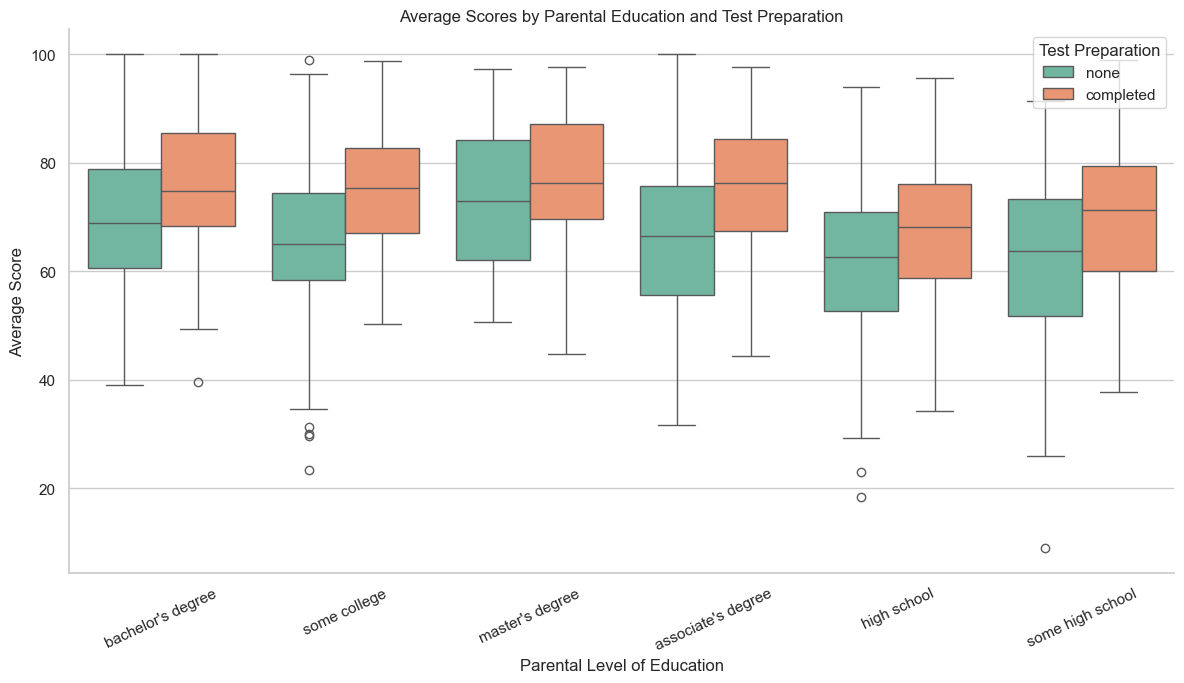

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(
    x="parental level of education",
    y="Mean_score",
    hue="test preparation course",
    data=df,
    palette="Set2"
)

plt.title("Average Scores by Parental Education and Test Preparation")
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Score")

sns.despine()
plt.legend(title="Test Preparation", loc="upper right")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

               Mean_score  math score  reading score  writing score
Mean_score       1.000000    0.918744       0.970331       0.965669
math score       0.918744    1.000000       0.817580       0.802642
reading score    0.970331    0.817580       1.000000       0.954598
writing score    0.965669    0.802642       0.954598       1.000000


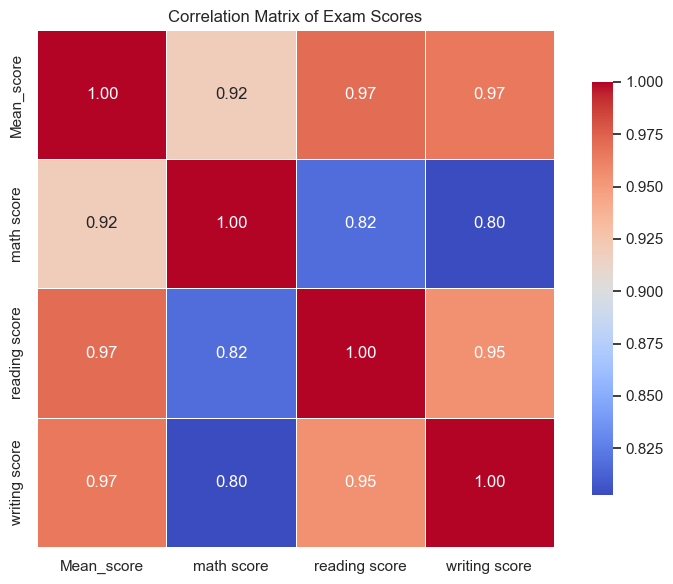

In [17]:
corr_matrix = df[["Mean_score", "math score", "reading score", "writing score"]].corr()
print(corr_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,           # Show correlation values
    cmap="coolwarm",      # Color palette
    fmt=".2f",            # Decimal format
    square=True,          # Make cells square
    linewidths=0.5,       # Line between cells
    cbar_kws={"shrink": .8}  # Shrink colorbar
)

plt.title("Correlation Matrix of Exam Scores")

plt.tight_layout()
plt.show()

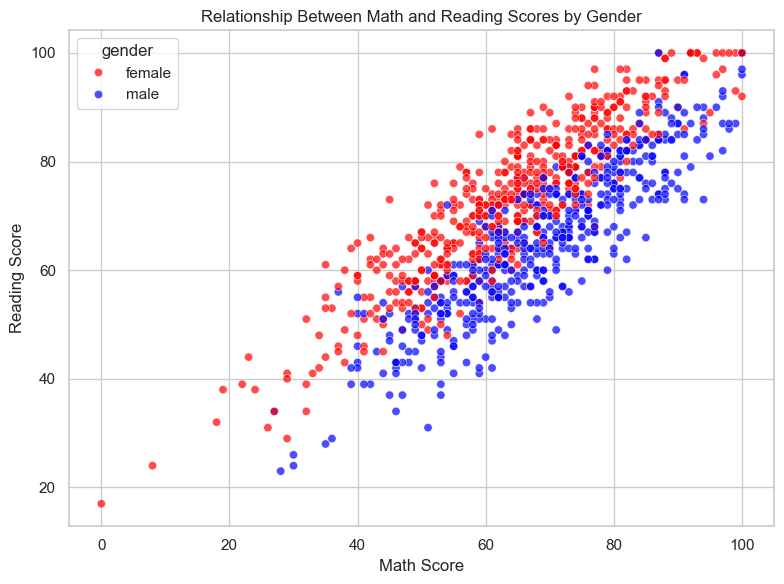

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="math score",
    y="reading score",
    hue="gender",                        # Color by gender
    palette={"male": "blue", "female": "red"},
    alpha=0.7                            # Set transparency for overlapping points
)

plt.title("Relationship Between Math and Reading Scores by Gender")
plt.xlabel("Math Score")
plt.ylabel("Reading Score")

plt.grid(True)

plt.tight_layout()
plt.show()

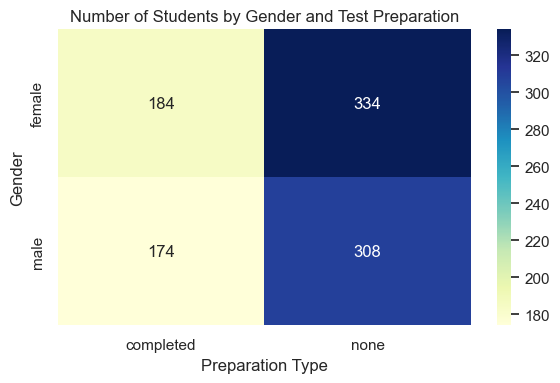

In [19]:
heatmap_data = df.pivot_table(
    index="gender",
    columns="test preparation course",
    values="Mean_score",
    aggfunc="count"    
).fillna(0)

plt.figure(figsize=(6, 4))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu"       
)

plt.title("Number of Students by Gender and Test Preparation")
plt.ylabel("Gender")
plt.xlabel("Preparation Type")

plt.tight_layout()
plt.show()

In [20]:
mean_scores = df.groupby("test preparation course")["Mean_score"].mean().round(2)

print(mean_scores)

test preparation course
completed    72.67
none         65.04
Name: Mean_score, dtype: float64


In [21]:
edu_scores = df.groupby('parental level of education')['Mean_score'].mean().round(2)
print(edu_scores)

parental level of education
associate's degree    69.57
bachelor's degree     71.92
high school           63.10
master's degree       73.60
some college          68.48
some high school      65.11
Name: Mean_score, dtype: float64


In [22]:
lunch_passed = df.groupby('lunch')['Passed'].mean().round(2)
print(lunch_passed)

lunch
free/reduced    0.56
standard        0.80
Name: Passed, dtype: float64


In [24]:
gender_score = df.groupby('gender')['Mean_score'].mean().round(2)
print(gender_score)

gender
female    69.57
male      65.84
Name: Mean_score, dtype: float64


In [25]:
X = dummies[
    [
        "gender_female", "gender_male",
        "race/ethnicity_group A", "race/ethnicity_group B", "race/ethnicity_group C", "race/ethnicity_group E",
        "lunch_free/reduced", "lunch_standard",
        "parental level of education_associate's degree", "parental level of education_bachelor's degree",
        "parental level of education_high school", "parental level of education_master's degree",
        "parental level of education_some college", "parental level of education_some high school",
        "test preparation course_completed", "test preparation course_none"
    ]
]

y = dummies["Passed"]

Accuracy:0.72
Precision:0.74
Recall:0.90
F1-score:0.81

 Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.31      0.41        94
           1       0.74      0.90      0.81       206

    accuracy                           0.72       300
   macro avg       0.67      0.61      0.61       300
weighted avg       0.69      0.72      0.69       300



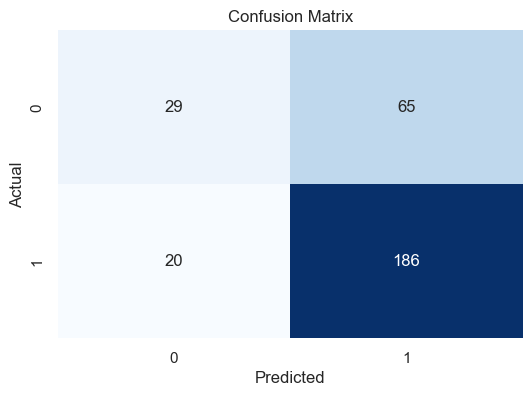

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model_logistic = LogisticRegression(max_iter=500)
model_logistic.fit(X_train, y_train)

# Make predictions on the test set
predictions = model_logistic.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print metrics
print(f"Accuracy:{accuracy:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Recall:{recall:.2f}")
print(f"F1-score:{f1:.2f}")

# Detailed classification report
print("\n Classification Report:")
print(classification_report(y_test, predictions))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Evaluate model performance
acc_log = accuracy_score(y_test, predictions)
prec_log = precision_score(y_test, predictions)
rec_log = recall_score(y_test, predictions)
f1_log = f1_score(y_test, predictions)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Gradient Boosting Results:
Accuracy:0.68
Precision:0.74
Recall:0.82
F1-score:0.78

 Confusion Matrix:
[[ 34  60]
 [ 37 169]]


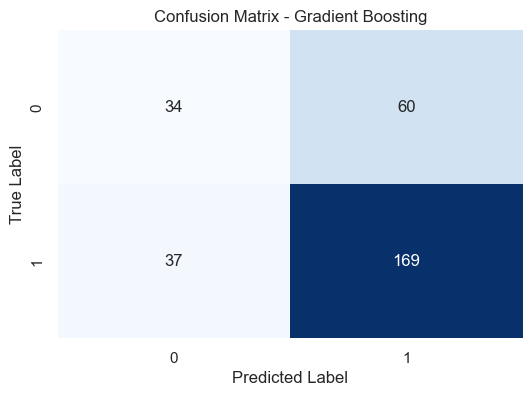


 Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.36      0.41        94
           1       0.74      0.82      0.78       206

    accuracy                           0.68       300
   macro avg       0.61      0.59      0.59       300
weighted avg       0.66      0.68      0.66       300



In [27]:
model_gradient = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

model_gradient.fit(X_train, y_train)


predictions = model_gradient.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

#  Evaluate model performance
acc_gb = accuracy_score(y_test, predictions)
prec_gb = precision_score(y_test, predictions)
rec_gb = recall_score(y_test, predictions)
f1_gb = f1_score(y_test, predictions)

#  Print evaluation metrics
print("Gradient Boosting Results:")
print(f"Accuracy:{accuracy:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Recall:{recall:.2f}")
print(f"F1-score:{f1:.2f}")

#  Show confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("\n Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


print("\n Classification Report:")
print(classification_report(y_test, predictions))

K-Nearest Neighbors Results:
Accuracy:0.68
Precision:0.74
Recall:0.82
F1-score:0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.38      0.43        94
           1       0.74      0.82      0.78       206

    accuracy                           0.68       300
   macro avg       0.61      0.60      0.60       300
weighted avg       0.66      0.68      0.67       300



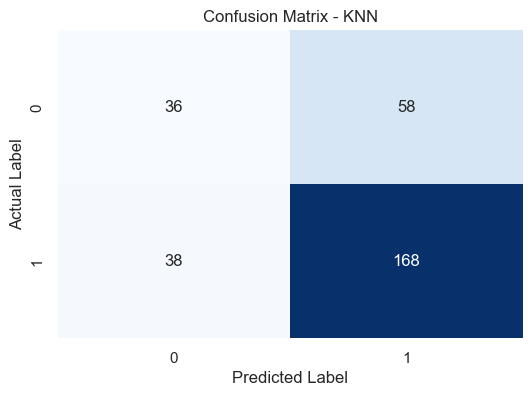

In [28]:
model_knn = KNeighborsClassifier(n_neighbors=5)


model_knn.fit(X_train, y_train)


pred_knn = model_knn.predict(X_test)


acc_knn = accuracy_score(y_test, pred_knn)
prec_knn = precision_score(y_test, pred_knn)
rec_knn = recall_score(y_test, pred_knn)
f1_knn = f1_score(y_test, pred_knn)


print("K-Nearest Neighbors Results:")
print(f"Accuracy:{acc_knn:.2f}")
print(f"Precision:{prec_knn:.2f}")
print(f"Recall:{rec_knn:.2f}")
print(f"F1-score:{f1_knn:.2f}")


print("\nClassification Report:")
print(classification_report(y_test, pred_knn))


conf_matrix_knn = confusion_matrix(y_test, pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Random Forest Results:
Accuracy:0.70
Precision:0.73
Recall:0.90
F1-score:0.81

Confusion Matrix:
[[ 24  70]
 [ 20 186]]


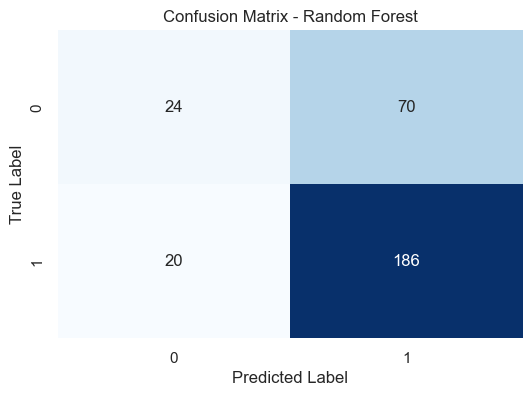


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.26      0.35        94
           1       0.73      0.90      0.81       206

    accuracy                           0.70       300
   macro avg       0.64      0.58      0.58       300
weighted avg       0.67      0.70      0.66       300


Feature Importance:
lunch_free/reduced                                0.144909
test preparation course_completed                 0.126026
lunch_standard                                    0.120646
test preparation course_none                      0.111767
race/ethnicity_group B                            0.064566
gender_male                                       0.060055
parental level of education_high school           0.056029
race/ethnicity_group E                            0.045086
parental level of education_some high school      0.045054
race/ethnicity_group C                            0.042755
race/ethnicity_group A                

In [29]:
model_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

model_forest.fit(X_train, y_train)

predictions = model_forest.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Random Forest Results:")
print(f"Accuracy:{accuracy:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Recall:{recall:.2f}")
print(f"F1-score:{f1:.2f}")

acc_rf = accuracy_score(y_test, predictions)
prec_rf = precision_score(y_test, predictions)
rec_rf = recall_score(y_test, predictions)
f1_rf = f1_score(y_test, predictions)

conf_matrix = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, predictions))

# 9. Feature importance
importances = model_forest.feature_importances_
feature_names = X.columns
forest_importance = pd.Series(importances, index=feature_names)

print("\nFeature Importance:")
print(forest_importance.sort_values(ascending=False))

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model_svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)

Accuracy:0.69
Precision:0.73
Recall:0.87
F1-score:0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.28      0.36        94
           1       0.73      0.87      0.79       206

    accuracy                           0.69       300
   macro avg       0.61      0.58      0.57       300
weighted avg       0.66      0.69      0.66       300



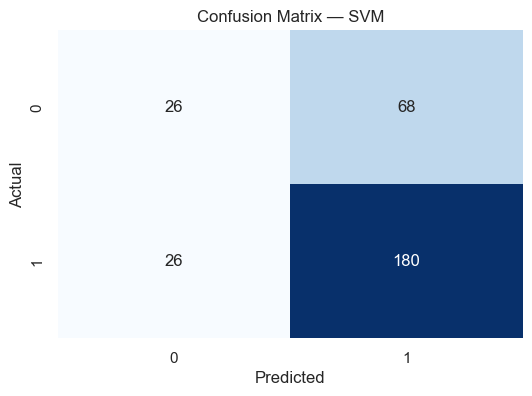

In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:{accuracy:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Recall:{recall:.2f}")
print(f"F1-score:{f1:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

acc_svm = accuracy_score(y_test, predictions)
prec_svm = precision_score(y_test, predictions)
rec_svm = recall_score(y_test, predictions)
f1_svm = f1_score(y_test, predictions)



conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix — SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

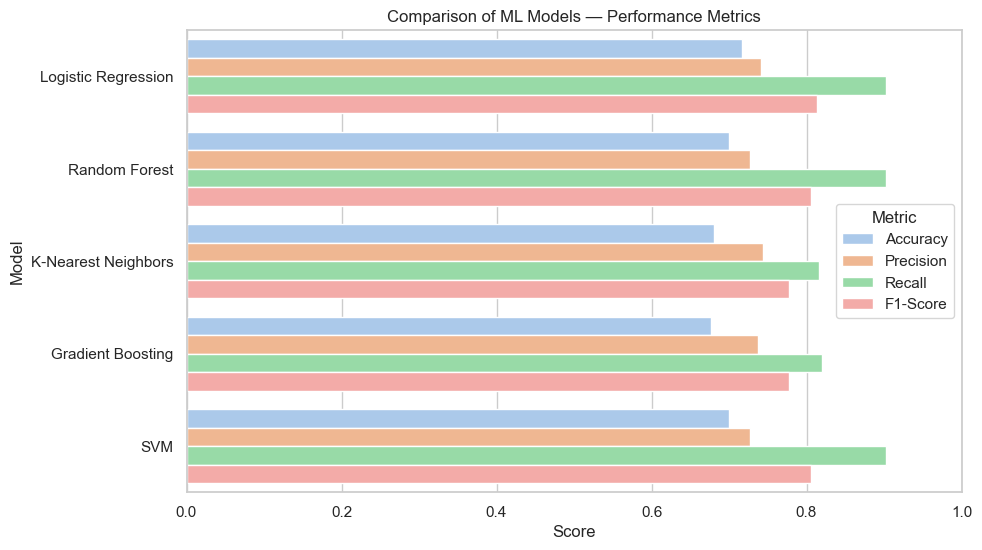

In [32]:
results = {
"Model": ["Logistic Regression", "Random Forest", "K-Nearest Neighbors", "Gradient Boosting", "SVM"],
"Accuracy":  [acc_log, acc_rf, acc_knn, acc_gb, acc_svm],
"Precision": [prec_log, prec_rf, prec_knn, prec_gb, prec_svm],
"Recall":    [rec_log, rec_rf, rec_knn, rec_gb, rec_svm],
"F1-Score":  [f1_log, f1_rf, f1_knn, f1_gb, f1_svm]
}

results_df = pd.DataFrame(results)



plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars="Model"), x="value", y="Model", hue="variable", palette="pastel")
plt.title("Comparison of ML Models — Performance Metrics")
plt.xlabel("Score")
plt.ylabel("Model")
plt.legend(title="Metric")
plt.xlim(0, 1)
plt.show()